# Análise exploratória de dados

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Dicionáriodos dados

In [3]:
df_dict = pd.DataFrame([{
"Variável":"total_bill",
"Descrição":"total gasto com consumido/refeição",
"Tipo":"quantitativa",
"Subtipo ":"continua",
},{
"Variável":"tip",
"Descrição":"valor da gorjeta",
"Tipo":"quantitativa",
"Subtipo":"discreta",
},{
"Variável":"sex",
"Descrição":"gênero do consumidor pagante, masculino/feminino",
"Tipo":"qualitativa",
"Subtipo":"nominal",
},{
"Variável":"smoker",
"Descrição":"fumante ou não fumante",
"Tipo":"qualitativa",
"Subtipo":"nominal",
},{
"Variável":"day",
"Descrição":"dia da semana da ocorrencia",
"Tipo":"qualitativa",
"Subtipo":"ordinal",
},{
"Variável":"time",
"Descrição":"horário/período correspondente a refeição, almoço, janta, lanche, café da manhã",
"Tipo":"qualitativa",
"Subtipo":"ordinal",
},{
"Variável":"size",
"Descrição":"cadeiras na mesa ou tamanho do grupo",
"Tipo":"quantitativa",
"Subtipo":"discreta",
}])

df_dict

,Variável,Descrição,Tipo,Subtipo,Subtipo
0,total_bill,total gasto com consumido/refeição,quantitativa,continua,NaN
1,tip,valor da gorjeta,quantitativa,NaN,discreta
2,sex,"gênero do consumidor pagante, masculino/feminino",qualitativa,NaN,nominal
3,smoker,fumante ou não fumante,qualitativa,NaN,nominal
4,day,dia da semana da ocorrencia,qualitativa,NaN,ordinal
5,time,"horário/período correspondente a refeição, alm...",qualitativa,NaN,ordinal
6,size,cadeiras na mesa ou tamanho do grupo,quantitativa,NaN,discreta


In [4]:
data = {
    "Variável": ["total_bill", "tips", "sex", "smoker", "day", "time", "size"],
    "Descrição": [
        "total gasto com comida/refeição",
        "valor da gorjeta",
        "gênero do consumidor pagante, masculino/feminino",
        "fumante ou não fumante",
        "dia da semana da ocorrência",
        "horário/período correspondente à refeição, almoço, janta, lanche, café da manhã",
        "tamanho de algo não identificado na tabela (cadeiras na mesa ou tamanho do grupo)",
    ],
    "Tipo": ["quantitativa", "quantitativa", "qualitativa", "qualitativa", "qualitativa", "qualitativa", "quantitativa"],
    "Subtipo": ["continua", "discreta", "nominal", "nominal", "ordinal", "ordinal", "discreta"],
}

df_dict = pd.DataFrame(data)

df_dict


,Variável,Descrição,Tipo,Subtipo
0,total_bill,total gasto com comida/refeição,quantitativa,continua
1,tips,valor da gorjeta,quantitativa,discreta
2,sex,"gênero do consumidor pagante, masculino/feminino",qualitativa,nominal
3,smoker,fumante ou não fumante,qualitativa,nominal
4,day,dia da semana da ocorrência,qualitativa,ordinal
5,time,"horário/período correspondente à refeição, alm...",qualitativa,ordinal
6,size,tamanho de algo não identificado na tabela (ca...,quantitativa,discreta


In [5]:
df_dict.query('Tipo == "qualitativa"')

,Variável,Descrição,Tipo,Subtipo
2,sex,"gênero do consumidor pagante, masculino/feminino",qualitativa,nominal
3,smoker,fumante ou não fumante,qualitativa,nominal
4,day,dia da semana da ocorrência,qualitativa,ordinal
5,time,"horário/período correspondente à refeição, alm...",qualitativa,ordinal


## Descrição dos dados usando estatísitca

### Variaveis Qualitativas

In [6]:
#Moda
#print(df['sex'].mode())
print('moda: ')
df[['sex','smoker','day','time']].mode()

moda: 


,sex,smoker,day,time
0,Male,No,Sat,Dinner


In [7]:
qualitativas = ['sex', 'smoker', 'day', 'time']

# Loop externo 
for coluna in qualitativas:    
    # cada valor únicos na coluna
    unicos = df[coluna].unique()
    # Loop interno nos valores
    for valor in unicos:
        # Filtrar no valor atual 
        filtrado = df[df[coluna] == valor]
        # Descrever os dados 
        print(coluna,' - ',valor)
        print(df[df[coluna] == valor].describe())
        print()
        

sex  -  Female
       total_bill        tip       size
count   87.000000  87.000000  87.000000
mean    18.056897   2.833448   2.459770
std      8.009209   1.159495   0.937644
min      3.070000   1.000000   1.000000
25%     12.750000   2.000000   2.000000
50%     16.400000   2.750000   2.000000
75%     21.520000   3.500000   3.000000
max     44.300000   6.500000   6.000000

sex  -  Male
       total_bill         tip        size
count  157.000000  157.000000  157.000000
mean    20.744076    3.089618    2.630573
std      9.246469    1.489102    0.955997
min      7.250000    1.000000    1.000000
25%     14.000000    2.000000    2.000000
50%     18.350000    3.000000    2.000000
75%     24.710000    3.760000    3.000000
max     50.810000   10.000000    6.000000

smoker  -  No
       total_bill         tip        size
count  151.000000  151.000000  151.000000
mean    19.188278    2.991854    2.668874
std      8.255582    1.377190    1.017984
min      7.250000    1.000000    1.000000
25%     

### Variaveis Quant

In [8]:
#describe
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
quantitativas=['total_bill','tip','size']

#Média
print('Média: ')
print(df[quantitativas].mean())

print()
#Mediana
print('Mediana: ')
print(df[quantitativas].median())

Média: 
total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

Mediana: 
total_bill    17.795
tip            2.900
size           2.000
dtype: float64


In [12]:
#Amplitude
print('Amplitude')
print(df[quantitativas].max() - df[quantitativas].min())
print()
print('Desvio padrão')
#Desvio padrão
print(df[quantitativas].std())
print()
print('Variância')
#Variância
print(df[quantitativas].var())
print()


Amplitude
total_bill    47.74
tip            9.00
size           5.00
dtype: float64

Desvio padrão
total_bill    8.902412
tip           1.383638
size          0.951100
dtype: float64

Variância
total_bill    79.252939
tip            1.914455
size           0.904591
dtype: float64



In [19]:
#Quartis
import numpy as np
print(np.percentile(df[quantitativas], [25, 50, 75]))

[ 2.      3.395  13.3025]


## Histogramas

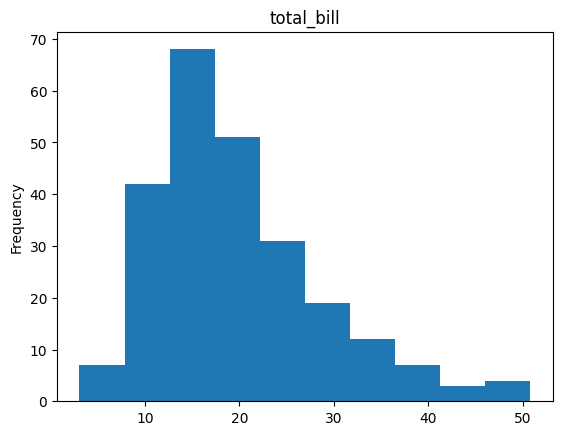

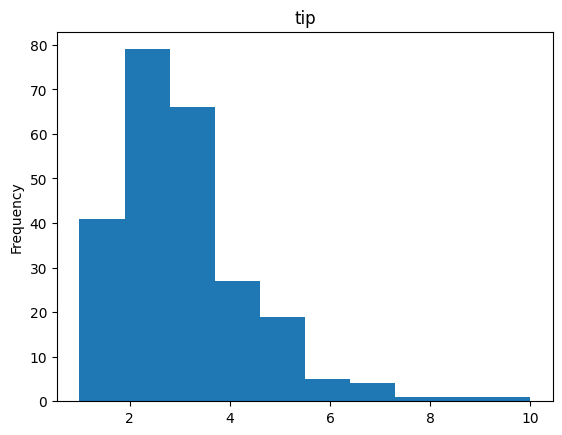

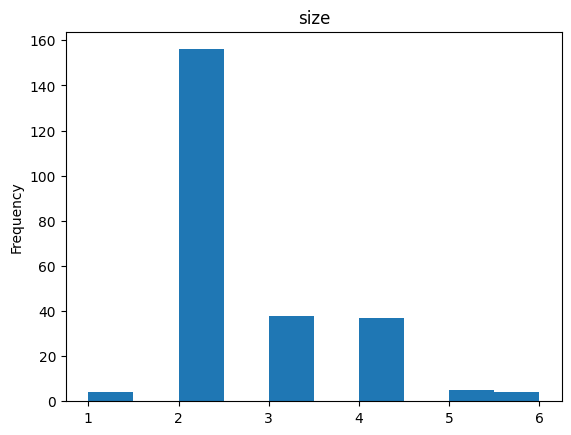

In [24]:
import matplotlib.pyplot as plt

for coluna in df[quantitativas]:
    plt.figure() 
    df[coluna].plot.hist()
    plt.title(coluna)
    
plt.show()

In [ ]:
#Histogramas
df[quantitativas].plot.hist()

In [ ]:
#Boxplot
df.boxplot(column='total_bill')

## Perguntas de partida e hipóteses

## 3. Insights